<a href="https://colab.research.google.com/github/bikash086-ctrl/MLnow_2.0/blob/main/Univariate_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd'/content/drive/MyDrive/student/student'

/content/drive/MyDrive/student/student


In [3]:
ls

cleanedMathData.csv  student-mat.csv  student-por.csv     student.txt
student.gdoc         student-merge.R  student-por.gsheet


In [4]:
import pandas as pd
import numpy as np 
import tensorflow as tf 
from tensorflow import keras
import os

In [6]:
MathData = pd.read_csv('student-mat.csv', sep=';') 

In [7]:
MathData.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


In [8]:
UniMathData = MathData[['G1', 'G3']]
UniMathData.head(5)

,G1,G3
0,5,6
1,5,6
2,7,10
3,15,15
4,6,10


In [9]:
UniMathData.to_csv('Univariate_MathData_2.csv')

In [10]:
ls

cleanedMathData.csv  student-merge.R     student.txt
student.gdoc         student-por.csv     Univariate_MathData_2.csv
student-mat.csv      student-por.gsheet


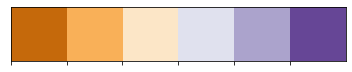

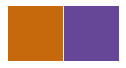

In [11]:
import seaborn as sns 
sns.palplot(sns.color_palette('PuOr'))
pal=sns.color_palette('PuOr')
pal.as_hex()

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors=['#c6690c','#664697']
sns.set_palette(sns_colors)
sns.palplot(sns.color_palette(sns_colors))


In [12]:
UniMathData.columns

Index(['G1', 'G3'], dtype='object')

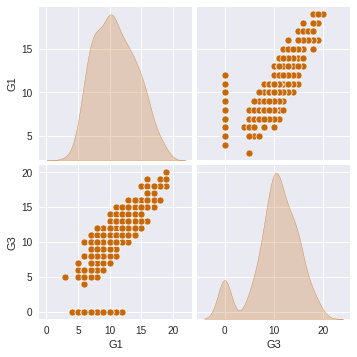

In [14]:
sns.pairplot(UniMathData,
             x_vars = ['G1', 'G3'],
             y_vars =  ['G1', 'G3'],
       diag_kind='kde'
             )

In [15]:
TrainDataset = UniMathData.sample(frac=0.8, random_state=0) 
TestDataset = UniMathData.drop(TrainDataset.index)

print(TrainDataset.head())
print(TestDataset.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [17]:
print(TrainDataset.shape)
print(TestDataset.shape)

(316, 2)
(79, 2)


In [18]:
TrainFeatures = TrainDataset.copy()
TestFeatures = TestDataset.copy()

print(TrainFeatures.head())
print(TestFeatures.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [19]:
TrainLabels = TrainFeatures.pop('G3')
TestLabels = TestFeatures.pop('G3')

print(TrainLabels.head())
print(TestLabels.head())

329    14
318    10
317     9
65     15
59     16
Name: G3, dtype: int64
9     15
25     8
28    11
31    17
32    16
Name: G3, dtype: int64


In [20]:
print(TrainFeatures.head())
print(TestFeatures.head())

     G1
329  14
318  11
317   9
65   16
59   15
    G1
9   14
25   6
28  11
31  17
32  17


In [21]:
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

In [22]:
model.compile(
    loss = 'mean_absolute_error',
    optimizer = tf.keras.optimizers.Adam(0.001), 
    metrics = ['mae', 'mse']
)

In [23]:
numEpochs = 300
history = model.fit(x = TrainFeatures, y = TrainLabels, validation_data = (TestFeatures, TestLabels), epochs = numEpochs)

Epoch 1/300
10/10 [==============================] - 1s 18ms/step - loss: 6.6341 - mae: 6.6341 - mse: 49.7758 - val_loss: 6.7638 - val_mae: 6.7638 - val_mse: 51.1832
Epoch 2/300
10/10 [==============================] - 0s 3ms/step - loss: 6.5332 - mae: 6.5332 - mse: 48.2006 - val_loss: 6.6544 - val_mae: 6.6544 - val_mse: 49.4770
Epoch 3/300
10/10 [==============================] - 0s 3ms/step - loss: 6.4338 - mae: 6.4338 - mse: 46.6936 - val_loss: 6.5443 - val_mae: 6.5443 - val_mse: 47.7945
Epoch 4/300
10/10 [==============================] - 0s 4ms/step - loss: 6.3326 - mae: 6.3326 - mse: 45.1790 - val_loss: 6.4347 - val_mae: 6.4347 - val_mse: 46.1542
Epoch 5/300
10/10 [==============================] - 0s 3ms/step - loss: 6.2330 - mae: 6.2330 - mse: 43.7493 - val_loss: 6.3246 - val_mae: 6.3246 - val_mse: 44.5371
Epoch 6/300
10/10 [==============================] - 0s 3ms/step - loss: 6.1316 - mae: 6.1316 - mse: 42.2893 - val_loss: 6.2155 - val_mae: 6.2155 - val_mse: 42.9693
Epoch 7/3

In [24]:
print(history)

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


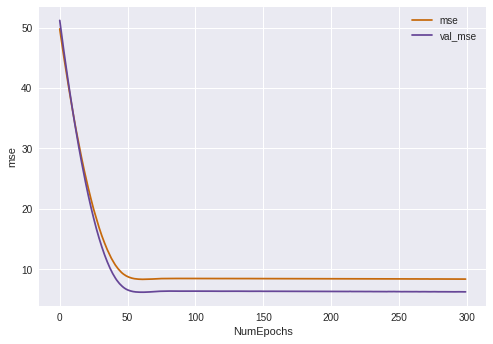

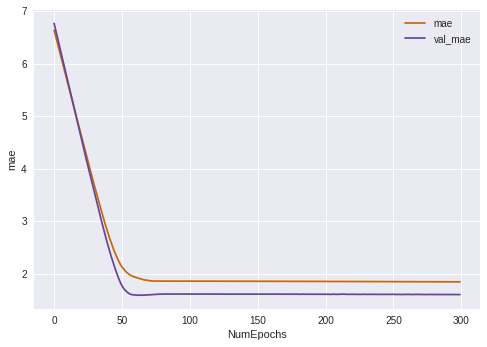

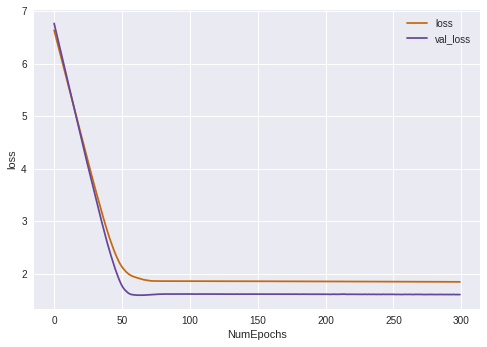

In [26]:
def CurvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


CurvePlots('mse')
CurvePlots('mae')
CurvePlots('loss')

In [29]:
model.predict([1])

array([[1.2221009]], dtype=float32)

In [30]:
print(f'Prediction for input value 1: {model.predict([1])}')

TempListforPreds = [1,2,3,4,5]
print(f'''input List = {TempListforPreds}


List of Predictions:
{model.predict(TempListforPreds)}

List of Predictions (flattened out):
{model.predict(TempListforPreds).flatten()}
''')

Prediction for input value 1: [[1.2221009]]
input List = [1, 2, 3, 4, 5]


List of Predictions:
[[1.2221009]
 [2.2017996]
 [3.1814985]
 [4.161197 ]
 [5.1408963]]

List of Predictions (flattened out):
[1.2221009 2.2017996 3.1814985 4.161197  5.1408963]



In [31]:
print(TestFeatures)

     G1
9    14
25    6
28   11
31   17
32   17
..   ..
365  10
367   7
379  10
381   7
393  11

[79 rows x 1 columns]


In [33]:
TestPreds = model.predict(TestFeatures).flatten()

In [34]:
print(len(TestPreds))
print(TestPreds)

79
[13.958186  6.120595 11.01909  16.897282 16.897282 11.998788 13.958186
 18.85668  18.85668   8.079992 13.958186 12.978487  8.079992  7.100294
  9.059691 12.978487 11.01909  15.917583  7.100294 10.039391 14.937884
 12.978487 13.958186 15.917583  7.100294  7.100294  8.079992 10.039391
 11.998788 10.039391 11.998788 12.978487 10.039391  6.120595  9.059691
 11.998788  7.100294  8.079992 13.958186  9.059691  9.059691  7.100294
 11.998788  6.120595 12.978487  7.100294  7.100294 11.01909  12.978487
 16.897282 11.998788 14.937884  9.059691 11.998788 14.937884 11.998788
 14.937884 11.998788 14.937884 11.01909  11.998788  8.079992 15.917583
  7.100294 15.917583 11.01909  15.917583 12.978487  8.079992  8.079992
 11.998788 17.87698  12.978487 15.917583 10.039391  7.100294 10.039391
  7.100294 11.01909 ]


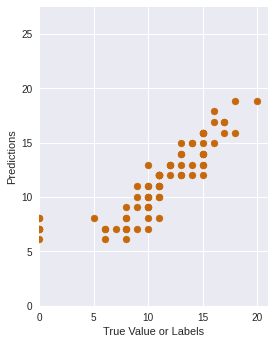

In [35]:
def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

predPlot(TestLabels, TestPreds)

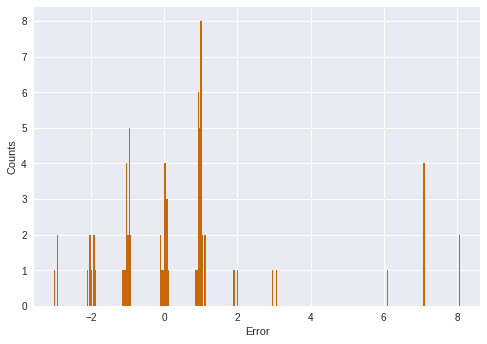

In [36]:
def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(TestPreds, TestLabels, numEpochs)
